# Project: Wrangling and Analyze @WeRateDogs Twitter Data

### _by Osaze Agho_


## Table of Contents
<ul>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#analyzing_visualizing">Analyzing and Visualizing Data</a></li>
<li><a href="#insights">Insights</a></li>
</ul>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

<a id ='gathering'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# load dataset
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

Define the url and use the `requests.get` method

In [3]:
# download image_prediction tsv file programmatically from URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# confirm requests
response.status_code

200

In [4]:
# opening a tsv file and saving content 
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

# read and view tsv file
img_predict = pd.read_csv('image_predictions.tsv', sep = '\t')
img_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Query twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

# assign the values accordingly, connect to the API, and intialize API 
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

# authorization of consumer key and consumer secret
auth = OAuthHandler(consumer_key, consumer_secret)

# set access to user's access key and access secret 
auth.set_access_token(access_token, access_secret)

# calling the api 
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# Tweet IDs to gather additional data via Twitter's API

# this code extracts the tweet IDs from the first dataframe "twitter_df"
tweet_ids = twitter_df.tweet_id.values
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [7]:
# confirm total number of tweet IDs
len(tweet_ids)

2356

In [8]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
flaw_dict = dict()

# code timer
start = timer()


# Save each tweet's returned JSON as a new line in a .txt file 
with open('tweet_json.txt', 'w') as tweetfile:
    # Loop takes about 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        
        try:
            # obtaining the status
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print(str(count) + ": " + str(tweet_id))

            # Convert and write each status as JSON formatted data into the tweetfile
            json.dump(tweet._json, tweetfile)
            tweetfile.write('\n')
        
        except tweepy.TweepyException as error:
            print(str(count) + ": " + str(tweet_id) + " has a flaw")

            # append errors to empty dictionary
            flaw_dict[tweet_id] = error
            pass
        
end = timer()
print(end - start)

1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257 has a flaw
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 884562892145688576
42: 884441805382717440
43: 884247878851493888
44: 88416

341: 832215909146226688
342: 832215726631055365
343: 832088576586297345
344: 832040443403784192
345: 832032802820481025
346: 831939777352105988
347: 831926988323639298
348: 831911600680497154
349: 831670449226514432
350: 831650051525054464
351: 831552930092285952
352: 831322785565769729
353: 831315979191906304
354: 831309418084069378
355: 831262627380748289
356: 830956169170665475
357: 830583320585068544
358: 830173239259324417
359: 830097400375152640
360: 829878982036299777
361: 829861396166877184
362: 829501995190984704
363: 829449946868879360
364: 829374341691346946 has a flaw
365: 829141528400556032
366: 829011960981237760
367: 828801551087042563
368: 828770345708580865
369: 828708714936930305
370: 828650029636317184
371: 828409743546925057
372: 828408677031882754
373: 828381636999917570
374: 828376505180889089
375: 828372645993398273
376: 828361771580813312
377: 828046555563323392
378: 828011680017821696
379: 827933404142436356
380: 827653905312006145
381: 827600520311402496
382: 

682: 788765914992902144
683: 788552643979468800
684: 788412144018661376
685: 788178268662984705
686: 788150585577050112
687: 788070120937619456
688: 788039637453406209
689: 787810552592695296
690: 787717603741622272
691: 787397959788929025
692: 787322443945877504
693: 787111942498508800
694: 786963064373534720
695: 786729988674449408
696: 786709082849828864
697: 786664955043049472
698: 786595970293370880
699: 786363235746385920
700: 786286427768250368
701: 786233965241827333
702: 786051337297522688
703: 786036967502913536
704: 785927819176054784
705: 785872687017132033
706: 785639753186217984
707: 785533386513321988
708: 785515384317313025
709: 785264754247995392
710: 785170936622350336
711: 784826020293709826
712: 784517518371221505
713: 784431430411685888
714: 784183165795655680
715: 784057939640352768
716: 783839966405230592
717: 783821107061198850
718: 783695101801398276
719: 783466772167098368
720: 783391753726550016
721: 783347506784731136
722: 783334639985389568
723: 78308570397

Rate limit reached. Sleeping for: 674


900: 758828659922702336
901: 758740312047005698
902: 758474966123810816
903: 758467244762497024
904: 758405701903519748
905: 758355060040593408
906: 758099635764359168
907: 758041019896193024
908: 757741869644341248
909: 757729163776290825
910: 757725642876129280
911: 757611664640446465
912: 757597904299253760
913: 757596066325864448
914: 757400162377592832
915: 757393109802180609
916: 757354760399941633
917: 756998049151549440
918: 756939218950160384
919: 756651752796094464
920: 756526248105566208
921: 756303284449767430
922: 756288534030475264
923: 756275833623502848
924: 755955933503782912
925: 755206590534418437
926: 755110668769038337
927: 754874841593970688
928: 754856583969079297
929: 754747087846248448
930: 754482103782404096
931: 754449512966619136
932: 754120377874386944
933: 754011816964026368 has a flaw
934: 753655901052166144
935: 753420520834629632
936: 753398408988139520
937: 753375668877008896
938: 753298634498793472
939: 753294487569522689
940: 753039830821511168
941: 

1233: 713175907180089344
1234: 712809025985978368
1235: 712717840512598017
1236: 712668654853337088
1237: 712438159032893441
1238: 712309440758808576
1239: 712097430750289920
1240: 712092745624633345
1241: 712085617388212225
1242: 712065007010385924
1243: 711998809858043904
1244: 711968124745228288
1245: 711743778164514816
1246: 711732680602345472
1247: 711694788429553666
1248: 711652651650457602
1249: 711363825979756544
1250: 711306686208872448
1251: 711008018775851008
1252: 710997087345876993
1253: 710844581445812225
1254: 710833117892898816
1255: 710658690886586372
1256: 710609963652087808
1257: 710588934686908417
1258: 710296729921429505
1259: 710283270106132480
1260: 710272297844797440
1261: 710269109699739648
1262: 710153181850935296
1263: 710140971284037632
1264: 710117014656950272
1265: 709918798883774466
1266: 709901256215666688
1267: 709852847387627521
1268: 709566166965075968
1269: 709556954897764353
1270: 709519240576036864
1271: 709449600415961088
1272: 709409458133323776


1561: 688519176466644993
1562: 688385280030670848
1563: 688211956440801280
1564: 688179443353796608
1565: 688116655151435777
1566: 688064179421470721
1567: 687841446767013888
1568: 687826841265172480
1569: 687818504314159109
1570: 687807801670897665
1571: 687732144991551489
1572: 687704180304273409
1573: 687664829264453632
1574: 687494652870668288
1575: 687480748861947905
1576: 687476254459715584
1577: 687460506001633280
1578: 687399393394311168
1579: 687317306314240000
1580: 687312378585812992
1581: 687127927494963200
1582: 687124485711986689
1583: 687109925361856513
1584: 687102708889812993
1585: 687096057537363968
1586: 686947101016735744
1587: 686760001961103360
1588: 686749460672679938
1589: 686730991906516992
1590: 686683045143953408
1591: 686618349602762752
1592: 686606069955735556
1593: 686394059078897668
1594: 686386521809772549
1595: 686377065986265092
1596: 686358356425093120
1597: 686286779679375361
1598: 686050296934563840
1599: 686035780142297088
1600: 686034024800862208


Rate limit reached. Sleeping for: 707


1801: 676975532580409345
1802: 676957860086095872
1803: 676949632774234114
1804: 676948236477857792
1805: 676946864479084545
1806: 676942428000112642
1807: 676936541936185344
1808: 676916996760600576
1809: 676897532954456065
1810: 676864501615042560
1811: 676821958043033607
1812: 676819651066732545
1813: 676811746707918848
1814: 676776431406465024
1815: 676617503762681856
1816: 676613908052996102
1817: 676606785097199616
1818: 676603393314578432
1819: 676593408224403456
1820: 676590572941893632
1821: 676588346097852417
1822: 676582956622721024
1823: 676575501977128964
1824: 676533798876651520
1825: 676496375194980353
1826: 676470639084101634
1827: 676440007570247681
1828: 676430933382295552
1829: 676263575653122048
1830: 676237365392908289
1831: 676219687039057920
1832: 676215927814406144
1833: 676191832485810177
1834: 676146341966438401
1835: 676121918416756736
1836: 676101918813499392
1837: 676098748976615425
1838: 676089483918516224
1839: 675898130735476737
1840: 675891555769696257


2130: 670290420111441920
2131: 670093938074779648
2132: 670086499208155136
2133: 670079681849372674
2134: 670073503555706880
2135: 670069087419133954
2136: 670061506722140161
2137: 670055038660800512
2138: 670046952931721218
2139: 670040295598354432
2140: 670037189829525505
2141: 670003130994700288
2142: 669993076832759809
2143: 669972011175813120
2144: 669970042633789440
2145: 669942763794931712
2146: 669926384437997569
2147: 669923323644657664
2148: 669753178989142016
2149: 669749430875258880
2150: 669684865554620416
2151: 669683899023405056
2152: 669682095984410625
2153: 669680153564442624
2154: 669661792646373376
2155: 669625907762618368
2156: 669603084620980224
2157: 669597912108789760
2158: 669583744538451968
2159: 669573570759163904
2160: 669571471778410496
2161: 669567591774625800
2162: 669564461267722241
2163: 669393256313184256
2164: 669375718304980992
2165: 669371483794317312
2166: 669367896104181761
2167: 669363888236994561
2168: 669359674819481600
2169: 669354382627049472


In [9]:
# twitter ID's with error
print(flaw_dict)

{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.'), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.'), 872261713294495745: NotFound('404 Not Found\n144 - No status found with that ID.'), 869988702071779329: NotFound('404 Not Found\n144 - No status found with that ID.'), 866816280283807744: NotFound('404 Not Found\n144 - No status found with that ID.'), 861769973181624320: NotFound('404 Not Found\n144 - No status found with that ID.'), 856602993587888130: NotFound('404 Not Found\n144 - No status found with that ID.'), 856330835276025856: NotFound('404 Not Found\n144 - No status found with that ID.'), 851953902622658560: NotFound('404 Not Found\n144 - No status found with that ID.'), 851861385021730816: NotFound('404 Not Found\n144 - No status found with that ID.'), 845459076796616705: NotFound('404 Not Found\n144 - No status found with tha

In [10]:
# list of dictionaries to read line by line and convert to a DataFrame

# empty list to append the dictionary of key/value pairs
df_list = list()

with open('tweet_json.txt', 'r') as file:
    for line in file.readlines():
        # parse through JSON strings and convert into a dictionary
        tweet_lines = json.loads(line)
        
        # initializing variables
        tweet_id = tweet_lines['id']
        retweet_counts = tweet_lines['retweet_count']
        favorite_counts = tweet_lines['favorite_count']
        
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': tweet_id,
                       'retweet_count': retweet_counts,
                       'favorite_count': favorite_counts})

# create dataframe with tweet attributes
tweet_attr = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [11]:
df_list

[{'tweet_id': 892420643555336193,
  'retweet_count': 7003,
  'favorite_count': 33800},
 {'tweet_id': 892177421306343426,
  'retweet_count': 5301,
  'favorite_count': 29319},
 {'tweet_id': 891815181378084864,
  'retweet_count': 3478,
  'favorite_count': 22044},
 {'tweet_id': 891689557279858688,
  'retweet_count': 7224,
  'favorite_count': 36924},
 {'tweet_id': 891327558926688256,
  'retweet_count': 7757,
  'favorite_count': 35307},
 {'tweet_id': 891087950875897856,
  'retweet_count': 2600,
  'favorite_count': 17803},
 {'tweet_id': 890971913173991426,
  'retweet_count': 1662,
  'favorite_count': 10360},
 {'tweet_id': 890729181411237888,
  'retweet_count': 15753,
  'favorite_count': 56853},
 {'tweet_id': 890609185150312448,
  'retweet_count': 3619,
  'favorite_count': 24516},
 {'tweet_id': 890240255349198849,
  'retweet_count': 6098,
  'favorite_count': 27955},
 {'tweet_id': 890006608113172480,
  'retweet_count': 6150,
  'favorite_count': 27034},
 {'tweet_id': 889880896479866881,
  'retwe

In [12]:
tweet_attr.sample(5)

,tweet_id,retweet_count,favorite_count
1913,673711475735838725,265,941
1347,701889187134500865,1256,3252
1118,727155742655025152,1201,3338
1208,712438159032893441,1422,4915
1547,687476254459715584,483,1833


<a id ='assessing'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Dataset Description

In [13]:
# used to display full text of values in columns
pd.set_option('display.max_colwidth', None)

In [14]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [15]:
img_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [16]:
tweet_attr

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7003,33800
1,892177421306343426,5301,29319
2,891815181378084864,3478,22044
3,891689557279858688,7224,36924
4,891327558926688256,7757,35307
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


In [17]:
# concise summary of twitter_archive_enchanced dataset
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
# concise summary of image_prediction dataset
img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
# concise summary of tweet_json data
tweet_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [20]:
# statistical summary of image_prediction dataset
img_predict.describe() 

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
# statistical summary of tweet_json data
tweet_attr.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2470.016330,7052.252256
std,6.820795e+16,4183.077715,10959.616068
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,493.500000,1225.000000
50%,7.178418e+17,1148.000000,3051.000000
75%,7.986547e+17,2860.500000,8600.500000
max,8.924206e+17,70698.000000,144829.000000


In [22]:
# number of unique values in twitter_archive_enchanced dataset
twitter_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [23]:
# mumber of unique values in image_predictions dataset
img_predict.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [24]:
# number of unique values in tweet_json dataset
tweet_attr.nunique()

tweet_id          2327
retweet_count     1664
favorite_count    1979
dtype: int64

In [25]:
twitter_df.duplicated().sum(), img_predict.duplicated().sum(), tweet_attr.duplicated().sum()

(0, 0, 0)

In [26]:
# dog names starting with a lower case character
twitter_df[twitter_df.name.str.islower()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

### Quality issues

1. Rows with tweets retweeted in `twitter_df` table such as retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp as these are retweets and not tweet related , which is irrelevant to the analysis 

2. Lots of missing data in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns, and expanded_urls columns in `twitter_df`table are irrelevant in analysis 

3. Inconsistent format of value in p1, p2, p3 of `img_predict` table

4. Incorrect data in name column mostly represented as names starting with lowercase, and missing data date represented as 'None' in `twitter_df` table

5. Al instead of Al Cabone in name column in `twitter_df` table

6. Erroneous Datatype (timestamp in string instead of datetime format) in `twitter_df` table

7. Rating_numerator is 75 instead of 9.75 for tweet_id - 786709082849828864 in `twitter_df` table

8. Rating_numerator and rating_denominator in ID 666287406224695296 are 1 and 2 respectively, instead of 9 and 10 in `twitter_df` table

9. More than one dog_stage ("doggo,floofer", "doggo,puppo", "doggo,pupper") as an observation in `twitter_df` table e.g 

### Tidiness issues
1. doggo, floofer, pupper, and puppo columns in separate columns (dog_stage)

2. Data in all three tables ( twitter_df, img_predict, tweet_attr) should be displayed as a single dataframe


<a id ='cleaning'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [27]:
# Make copies of original pieces of data
twitter_df_clean = twitter_df.copy()
img_predict_clean = img_predict.copy()
tweet_attr_clean = tweet_attr.copy()

### Issue #1: 
- rows with tweets retweeted in twitter_df table such as retweeted_status_id as these are retweets and not tweets, which is irrelevant to the analysis

#### Define:  
- remove rows with retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp values

#### Code

In [28]:
# Drop rows with retweeted tweets
twitter_df_clean = twitter_df_clean[twitter_df_clean.retweeted_status_id.isnull()]
twitter_df_clean = twitter_df_clean[twitter_df_clean.retweeted_status_user_id.isnull()]
twitter_df_clean = twitter_df_clean[twitter_df_clean.retweeted_status_timestamp.isnull()]

#### Test

In [29]:
twitter_df_clean['retweeted_status_id'].notnull().sum(), twitter_df_clean['retweeted_status_user_id'].notnull().sum(), twitter_df_clean['retweeted_status_timestamp'].notnull().sum()

(0, 0, 0)

### Issue #2: 
 - missing data in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns, and expanded_urls columns are irrelevant in analysis

#### Define:  
- drop the columns as they have too many missing data and not relevant for analysis 

#### Code

In [30]:
# list of columns to be removed
missing_cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls']

# drop columns
twitter_df_clean.drop(missing_cols, axis=1, inplace=True)

#### Test

In [31]:
# reset index
twitter_df_clean.reset_index(drop=True, inplace = True)
twitter_df_clean.tail()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2170,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,None,None,None,None,None
2171,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10,a,None,None,None,None
2172,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,a,None,None,None,None
2173,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,a,None,None,None,None
2174,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,8,10,None,None,None,None,None


### Issue #3:
- doggo, floofer, pupper, and puppo columns in separate columns (dog_stage)

#### Define
- create a new column called "dog_stage' and combine values in doggo, floofer, pupper, and puppo columns into 

#### Code

In [32]:
# Replace 'None' with empty string in all four columns (doggo, floofer, pupper, and puppo)

twitter_df_clean.doggo.replace('None', '', inplace=True)
twitter_df_clean.floofer.replace('None', '', inplace=True)
twitter_df_clean.pupper.replace('None', '', inplace=True)
twitter_df_clean.puppo.replace('None', '', inplace=True)

# combine observations in four columns 
twitter_df_clean['dog_stage'] = twitter_df_clean.doggo + twitter_df_clean.floofer + twitter_df_clean.pupper + twitter_df_clean.puppo

In [33]:
# verify values in dog_stage column
twitter_df_clean.dog_stage.value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [34]:
# separate values that appeared as multiple dogstages
twitter_df_clean.dog_stage = twitter_df_clean.dog_stage.replace('doggopupper', 'doggo,pupper')
twitter_df_clean.dog_stage = twitter_df_clean.dog_stage.replace('doggopuppo', 'doggo,puppo')
twitter_df_clean.dog_stage = twitter_df_clean.dog_stage.replace('doggofloofer', 'doggo,floofer')

In [35]:
# verify values in dog_stage column are correctly formatted 
twitter_df_clean.dog_stage.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [36]:
# drop all four columns (doggo, floofer, pupper, and puppo)
twitter_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [37]:
# replace empty values with NaN
twitter_df_clean.dog_stage = twitter_df_clean.dog_stage.replace('', np.nan)

#### Test

In [38]:
# verify empty values replaces with NaN
twitter_df_clean.dog_stage.value_counts()

pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

In [39]:
twitter_df_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
1502,681981167097122816,2015-12-29 23:32:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jimothy. He's a Trinidad Poliwhirl. Father was a velociraptor. Exceptionally unamused. 12/10 would adopt https://t.co/VwdIk0OwVx,12,10,Jimothy,NaN
604,779834332596887552,2016-09-25 00:06:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scout. He really wants to kiss himself. H*ckin inappropriate. 11/10 narcissistic af https://t.co/x0gV2Ck3AD,11,10,Scout,NaN
1226,699323444782047232,2016-02-15 20:04:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""I'm bathing the children what do you want?"" ...both 10/10 https://t.co/Rizm1LWh4z",10,10,None,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN
2052,668226093875376128,2015-11-22 00:34:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Sneaky dog here. Tuba player has no clue. 10/10 super sneaky https://t.co/jWVwSppaa2,10,10,None,NaN


### Issue #4
More than one dog_stage ("doggo,floofer", "doggo,puppo", "doggo,pupper") as an observation in `twitter_df` table

### Define
The dataset can only have four dog "stages" (doggo, floofer, pupper, and puppo), so ;
- "doggo,floofer" will be replaced with "doggo" based on description in text column
- "doggo,puppo" wil be replaced with 'puppo' based on description in the 'text' column
- "doggo,pupper" will be replaced with 'doggo' based on description in text column and because doggo is a big pupper


### Code

In [40]:
twitter_df_clean.dog_stage = twitter_df_clean.dog_stage.replace('doggo,floofer', 'doggo')
twitter_df_clean.dog_stage = twitter_df_clean.dog_stage.replace('doggo,puppo', 'puppo')
twitter_df_clean.dog_stage = twitter_df_clean.dog_stage.replace('doggo,pupper', 'doggo')

In [41]:
twitter_df_clean.dog_stage.value_counts()

pupper     224
doggo       86
puppo       25
floofer      9
Name: dog_stage, dtype: int64

### Issue #5:
- incorrect data in name column mostly represented as names starting with lowercase, and missing data represented as 'None' 

#### Define
replace all values starting with lowercase and 'None' with NaN. 

#### Code

In [42]:
# dog names starting with a lower case character
lower_names = list(twitter_df_clean[twitter_df_clean.name.str.islower()].name.unique())
print(lower_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [43]:
# replace lower case values and None with NaN
twitter_df_clean.name.replace(lower_names, np.nan, inplace=True)
twitter_df_clean.name.replace('None', np.nan, inplace=True)

In [44]:
twitter_df_clean.name.sort_values()

858      Abby
845      Abby
765       Ace
1754     Acro
1148    Adele
        ...  
2170      NaN
2171      NaN
2172      NaN
2173      NaN
2174      NaN
Name: name, Length: 2175, dtype: object

### Issue #6:
- Al instead of Al Cabone in name column in twitter_df table

#### Define
change dog name "Al" to "Al Cabone"

#### Code

In [45]:
# replace 'Al' with 'Al Cabone'
twitter_df_clean.name.replace('Al', 'Al Cabone', inplace=True)

#### Test

In [46]:
twitter_df_clean[twitter_df_clean.name == "Al"]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage


### Issue #7:
Erroneous Datatype (timestamp in string instead of datetime format) in twitter_df table


#### Define
convert timestamp datatype from string to datatime

#### Code


In [47]:
twitter_df_clean['timestamp'] = pd.to_datetime(twitter_df_clean['timestamp'])

#### Test

In [48]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                1391 non-null   object             
 7   dog_stage           344 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 136.1+ KB


### Issue #8:
rating_numerator is 75 instead of 9.75 for tweet_id - 786709082849828864

#### Define
Replace rating "75" with "9.75" in rows of rating_numerator column

#### Code

In [49]:
twitter_df_clean.rating_numerator.replace(75, 9.75, inplace=True)

#### Test

In [50]:
twitter_df_clean[twitter_df_clean['rating_numerator'] == 9.75]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
558,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10,Logan,NaN


### Issue #9:
Rating_numerator and rating_denominator in tweet_id 666287406224695296 are 1 and 2 respectively, instead of 9 and 10

#### Define
_Replace rating_numerator and rating_denominator with 9 and 10 respectively_

In [51]:
# rating_numerator
twitter_df_clean.iloc[2154, 4] = twitter_df_clean[twitter_df_clean.tweet_id == 666287406224695296].rating_numerator.replace(1.0, 9)

# rating_denominator
twitter_df_clean.iloc[2154, 5] = twitter_df_clean[twitter_df_clean.tweet_id == 666287406224695296].rating_denominator.replace(2, 10)

#### Test

In [52]:
# check tweet_id - 666287406224695296
twitter_df_clean[twitter_df_clean['tweet_id'] == 666287406224695296]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
2154,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9.0,10,NaN,NaN


### Issue #10:
Inconsistent format of value in p1, p2, p3 of `img_predict` table

#### Define
Convert all values in p1, p2, p3 columns to lowercase for consistency

#### Code

In [53]:
# convert values in p1, p2, p3 to lowercase
img_predict_clean.p1 = img_predict_clean.p1.str.lower()
img_predict_clean.p2 = img_predict_clean.p2.str.lower()
img_predict_clean.p3 = img_predict_clean.p3.str.lower()

#### Test

In [54]:
# confirm all values in p1, p2, p3 are lowercase
img_predict_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
207,669942763794931712,https://pbs.twimg.com/media/CUwdYL5UsAAP0XX.jpg,1,vizsla,0.743216,True,redbone,0.217282,True,rhodesian_ridgeback,0.028473,True
198,669625907762618368,https://pbs.twimg.com/media/CUr9NjgU8AEpf5w.jpg,1,seat_belt,0.874502,False,golden_retriever,0.055408,True,labrador_retriever,0.026854,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,siberian_husky,0.700377,True,eskimo_dog,0.166511,True,malamute,0.111411,True
1265,749317047558017024,https://pbs.twimg.com/ext_tw_video_thumb/749316899712950272/pu/img/nvZI9mkoAxt89sul.jpg,1,wire-haired_fox_terrier,0.155144,True,lakeland_terrier,0.108382,True,buckeye,0.074617,False
1152,732585889486888962,https://pbs.twimg.com/media/Ciqq-VFUUAANlWm.jpg,2,staffordshire_bullterrier,0.843359,True,american_staffordshire_terrier,0.028290,True,miniature_pinscher,0.016793,True


### Issue #11:
Data in all three tables ( twitter_df, img_predict, tweet_attr) should be displayed as a single dataframe

#### Define
Join the three dataframes to form a single dataframe. inner join should done using tweet_id as the common column across the three data sets

In [55]:
# merge all three dataframes
full_twitter_data = pd.merge(twitter_df_clean, img_predict_clean, on='tweet_id', how='inner').merge(tweet_attr_clean, on='tweet_id', how='inner')

#### Test

In [56]:
full_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   int64              
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   object             
 3   text                1986 non-null   object             
 4   rating_numerator    1986 non-null   float64            
 5   rating_denominator  1986 non-null   int64              
 6   name                1343 non-null   object             
 7   dog_stage           305 non-null    object             
 8   jpg_url             1986 non-null   object             
 9   img_num             1986 non-null   int64              
 10  p1                  1986 non-null   object             
 11  p1_conf             1986 non-null   float64            
 12  p1_dog              1986 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
# save dataset
full_twitter_data.to_csv('twitter_archive_master.csv', index=False)

<a id ='analyzing_visualizing'></a>
## Analyzing and Visualizing Data

In [58]:
# load saved dataset
twitter_data = pd.read_csv('twitter_archive_master.csv')
twitter_data.sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
650,759099523532779520,2016-07-29 18:53:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Toby. He has a drinking problem. Inflatable marijuana plant in the back is also not a good look. 7/10 cmon Toby https://t.co/Cim4DSj6Oi,7.0,10,Toby,NaN,https://pbs.twimg.com/media/Cojc_Q0WcAAqi_K.jpg,1,...,0.129034,True,kelpie,0.117508,True,siberian_husky,0.106708,True,3825,13631
360,813217897535406080,2016-12-26 03:00:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is Atlas. He went all out this year. 13/10 downright magical af https://t.co/DVYIZOnO81,13.0,10,Atlas,NaN,https://pbs.twimg.com/media/C0khWkVXEAI389B.jpg,1,...,0.905972,True,pomeranian,0.048038,True,west_highland_white_terrier,0.035667,True,6848,17676
672,756288534030475264,2016-07-22 00:43:32+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a heartwarming scene of a single father raising his two pups. Downright awe-inspiring af. 12/10 for everyone https://t.co/hfddJ0OiNR,12.0,10,NaN,NaN,https://pbs.twimg.com/media/Cn7gaHrWIAAZJMt.jpg,3,...,0.925621,False,french_bulldog,0.032492,True,tiger_cat,0.006679,False,16323,41230


In [59]:
# statistical summary of data 
twitter_data.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.986000e+03,1986.000000,1986.000000,1986.000000,1986.000000,1.986000e+03,1.986000e+03,1986.000000,1986.000000
mean,7.356142e+17,12.253147,10.538268,1.203424,0.593452,1.344853e-01,6.034994e-02,2242.629909,7707.923968
std,6.740686e+16,41.556667,7.332877,0.561492,0.271961,1.005944e-01,5.091948e-02,4017.283666,11371.847556
min,6.660209e+17,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,66.000000
25%,6.758214e+17,10.000000,10.000000,1.000000,0.362656,5.407533e-02,1.624755e-02,494.500000,1636.500000
50%,7.082494e+17,11.000000,10.000000,1.000000,0.587357,1.175370e-01,4.952715e-02,1079.000000,3464.500000
75%,7.873791e+17,12.000000,10.000000,1.000000,0.844920,1.951377e-01,9.166433e-02,2557.000000,9556.500000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,70698.000000,144829.000000


In [60]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1986 non-null   int64  
 1   timestamp           1986 non-null   object 
 2   source              1986 non-null   object 
 3   text                1986 non-null   object 
 4   rating_numerator    1986 non-null   float64
 5   rating_denominator  1986 non-null   int64  
 6   name                1343 non-null   object 
 7   dog_stage           305 non-null    object 
 8   jpg_url             1986 non-null   object 
 9   img_num             1986 non-null   int64  
 10  p1                  1986 non-null   object 
 11  p1_conf             1986 non-null   float64
 12  p1_dog              1986 non-null   bool   
 13  p2                  1986 non-null   object 
 14  p2_conf             1986 non-null   float64
 15  p2_dog              1986 non-null   bool   
 16  p3    

### Visualizations

### Q1. What is the Most Popular dog breed based on Algorithm's #1 Image Prediction?

In [61]:
# Top 5 dog breed by count 
twitter_data.p1.value_counts().nlargest(5)

golden_retriever      139
labrador_retriever     92
pembroke               88
chihuahua              79
pug                    54
Name: p1, dtype: int64

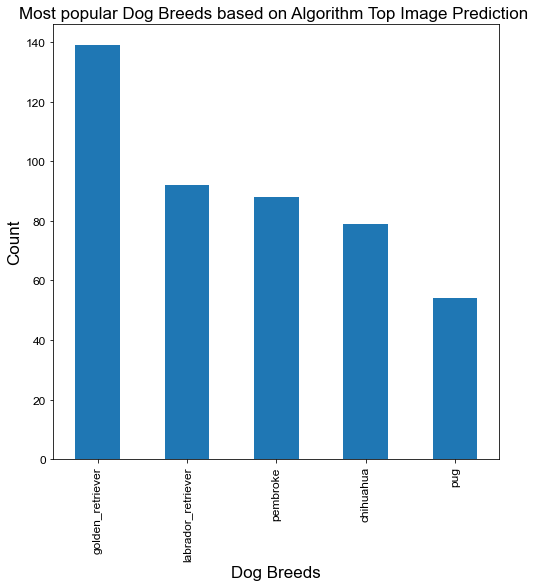

In [62]:
# Top 5 dog breeds from the Algorithm's #1 Prediction
twitter_data.p1.value_counts().nlargest(5).plot(kind='bar', figsize=(8,8), fontsize=12)

plt.title("Most popular Dog Breeds based on Algorithm Top Image Prediction ",fontsize=17)
plt.xlabel('Dog Breeds',fontsize=17)
plt.ylabel("Count",fontsize= 17);
plt.xticks(rotation=90);

sns.set_style('darkgrid')

### Q2. What is the highest rated dog stage?

In [63]:
# Dog stages with their average ratings
dog_stage_ratings = twitter_data.groupby('dog_stage').rating_numerator.mean().sort_values(ascending=False)
dog_stage_ratings

dog_stage
puppo      12.043478
floofer    12.000000
doggo      11.750000
pupper     10.714286
Name: rating_numerator, dtype: float64

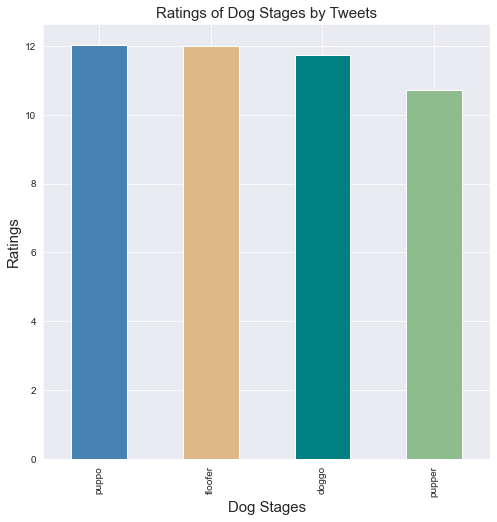

In [64]:
# bar chart of dog stages based on rating
dog_stage_ratings.plot(kind='bar', figsize=(8,8), color = ['steelblue', 'burlywood', 'teal', 'darkseagreen'])

plt.title("Ratings of Dog Stages by Tweets",fontsize=15)
plt.xlabel('Dog Stages',fontsize=15)
plt.ylabel("Ratings",fontsize= 15);

### Q3. Is there an association between Retweet Count and Favorite Count?

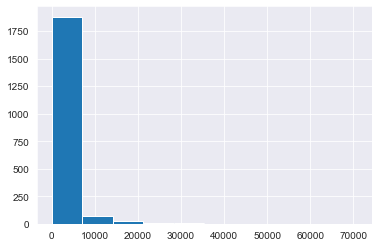

In [65]:
# histogram of retweet count
twitter_data.retweet_count.hist();

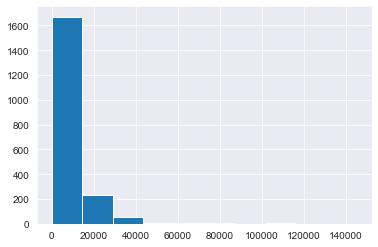

In [66]:
# histogram of favorite count
twitter_data.favorite_count.hist();

Correlation Between Retweet Count and Favorite Count :  0.9284032972074069


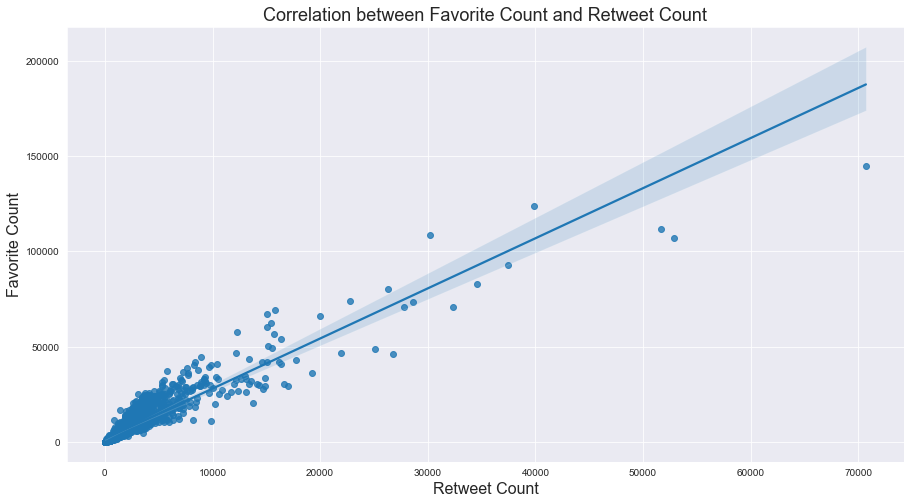

In [67]:
# Regression plot to view relationship between retweet count and favorite count

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# create regplot
sns.regplot(x = 'retweet_count', y = 'favorite_count', data = twitter_data, ax=ax)


plt.xlabel('Retweet Count', size=16)
plt.ylabel('Favorite Count', size=16)
plt.title('Correlation between Favorite Count and Retweet Count', size = 18)

# correlation between the variables
twitter_data_corr = twitter_data.corr()
print("Correlation Between Retweet Count and Favorite Count : ",twitter_data_corr.loc['retweet_count','favorite_count'])

<a id ='insights'></a>
### Insights:
1. The highest rated dog stage by tweet is **Puppo** 

2. There is a strong positive correlation of about 0.928 between retweet count and favorite count

3. Based on the algorithm's #1 prediction, the most popular dog breed is the **golden retriever**

4. The minimum retweet count is 11, mean is 2243, and the maximum retweet count is 70717

5. The minimum favorite count is 66, mean is 7709, and the maximum favorite count is 144774